<a href="https://colab.research.google.com/github/ghafoor545/Bytewise--ML--Track/blob/main/MONTH_02_WEEK_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`MONTH 2 WEEK 3`***

# **Part 1: Importing Libraries**
Description

In this section, we import the necessary libraries that will be used throughout the project. These include libraries for data manipulation (pandas), machine learning (scikit-learn), and visualization (matplotlib).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# **Part 2: Loading and Exploring the Data**
Description

This part involves loading the dataset from a CSV file, displaying the initial few rows to understand its structure, and checking for missing values.

In [2]:
df1 = pd.read_csv('/content/pakwheels_used_car_data_v02.csv')
print(df1.head(15))
print("Initial NaN values per column:")
print(df1.isnull().sum())


     addref        city  assembly       body      make    model    year  \
0   7943732    Peshawar       NaN      Sedan    Toyota  Corolla  2013.0   
1   7730314      Lahore       NaN      Sedan     Honda     City  2000.0   
2   7943737      Lahore       NaN      Sedan    Toyota    Yaris  2021.0   
3   7943733      Lahore       NaN  Hatchback    Suzuki    Swift  2017.0   
4   7923484      Lahore       NaN      Sedan     Honda    Civic  2017.0   
5   7943736      Vehari  Imported      Sedan     Honda    Civic  2010.0   
6   7764683   Islamabad       NaN  Hatchback    Suzuki    Swift  2019.0   
7   7943739  Faisalabad       NaN      Sedan     Honda     City  2018.0   
8   7894559      Lahore  Imported  Hatchback  Daihatsu     Move  2019.0   
9   7943724      Lahore       NaN      Sedan     Honda     City  2014.0   
10  7907725      Lahore  Imported  Hatchback  Daihatsu     Move  2019.0   
11  7943741      Lahore       NaN  Hatchback    Suzuki   Mehran  2019.0   
12  7943740     Sialkot  

# **Part 3: Data Cleaning and Preprocessing**
Description

This section handles data cleaning by removing rows with missing values and applies one-hot encoding to categorical features. Additionally, numerical columns are normalized.

In [6]:
df1_new = df1.dropna()
print(df1_new.head())
print("Checking if any NaN values exist per column:")
print(df1_new.isnull().sum())

# Corrected categorical columns
categorical_columns = ['assembly', 'body', 'city', 'color', 'fuel', 'make', 'model', 'registered', 'transmission']

# One-hot encoding for categorical columns
df1_one_hot = pd.get_dummies(df1_new, columns=categorical_columns)
print(df1_one_hot.head())

numerical_columns = df1_one_hot.select_dtypes(include=['int64', 'float64']).columns
df1_normalized = df1_one_hot.copy()
for col in numerical_columns:
    if df1_one_hot[col].max() != df1_one_hot[col].min():
        df1_normalized[col] = (df1_one_hot[col] - df1_one_hot[col].min()) / (df1_one_hot[col].max() - df1_one_hot[col].min())


     addref    city  assembly       body      make  model    year  engine  \
5   7943736  Vehari  Imported      Sedan     Honda  Civic  2010.0  1300.0   
8   7894559  Lahore  Imported  Hatchback  Daihatsu   Move  2019.0   660.0   
10  7907725  Lahore  Imported  Hatchback  Daihatsu   Move  2019.0   660.0   
13  7894570  Lahore  Imported  Hatchback  Daihatsu   Move  2019.0   660.0   
14  7929705  Lahore  Imported  Hatchback  Daihatsu   Move  2019.0   660.0   

   transmission    fuel            color     registered  mileage      price  
5     Automatic  Petrol  Albastar Silver         Punjab   157000  2850000.0  
8     Automatic  Petrol  Fire Quartz Red  Un-Registered    22517  3850000.0  
10    Automatic  Petrol    Unique Orange  Un-Registered    77450  3650000.0  
13    Automatic  Petrol           Silver  Un-Registered    47499  3850000.0  
14    Automatic  Petrol  Pearl White III  Un-Registered    69951  3550000.0  
Checking if any NaN values exist per column:
addref          0
city  

# **Part 4: Splitting Data for Training and Testing**
Description

The dataset is split into training and testing sets, with features (X) and target variable (y) separated. This helps in training the models and evaluating their performance on unseen data.



In [7]:
X = df1_normalized.drop('price', axis=1)
y = df1_normalized['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Part 5: Applying Linear Regression**
Description

A Linear Regression model is created and trained on the training data. Predictions are made on the test set, and various performance metrics are calculated.

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R2 Score:", r2_lr)


Linear Regression Results:
MSE: 1.0203169769861804e+16
MAE: 8264657.916118305
R2 Score: -4.101202818196333e+18


# **Part 6: Applying Random Forest Regression**
Description

A Random Forest Regressor is created and trained on the training data. Similar to Linear Regression, predictions are made on the test set, and performance metrics are calculated.

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)


Random Forest Regression Results:
MSE: 0.00014172546945747904
MAE: 0.0036088203952629318
R2 Score: 0.9430329095899103


# **Part 7: Results Visualization**
Description

This part visualizes the performance of the two models using bar charts for comparison. It compares Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 Score for both models.

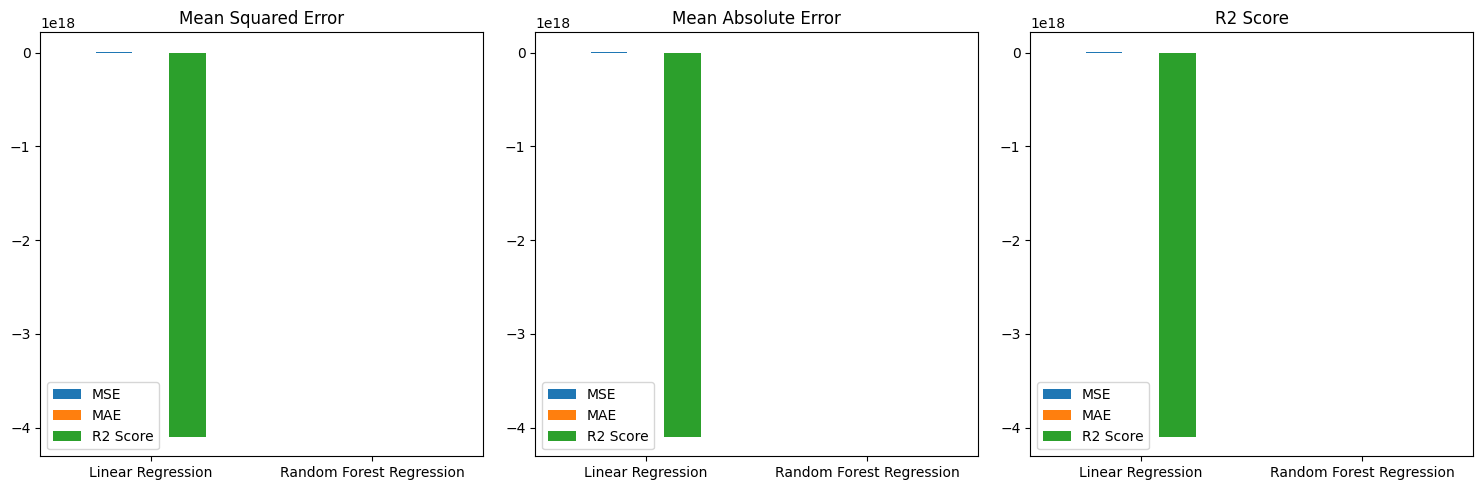

In [10]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'MSE': [mse_lr, mse_rf],
    'MAE': [mae_lr, mae_rf],
    'R2 Score': [r2_lr, r2_rf]
})

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
results.plot(kind='bar', ax=ax[0])
ax[0].set_title('Mean Squared Error')
ax[0].set_xticklabels(results['Model'], rotation=0)

results.plot(kind='bar', ax=ax[1])
ax[1].set_title('Mean Absolute Error')
ax[1].set_xticklabels(results['Model'], rotation=0)

results.plot(kind='bar', ax=ax[2])
ax[2].set_title('R2 Score')
ax[2].set_xticklabels(results['Model'], rotation=0)

plt.tight_layout()
plt.show()
